Text(0, 0.5, 'y(m)')

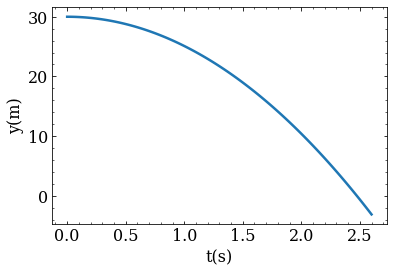

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.style.use('29S22.mplstyle')
t = np.linspace(0, 2.6, 100)
y = 30 - 0.5 * 9.8 * t**2
plt.plot(t,y)
plt.xlabel('t(s)')
plt.ylabel('y(m)')

Text(0, 0.5, 'N(x)')

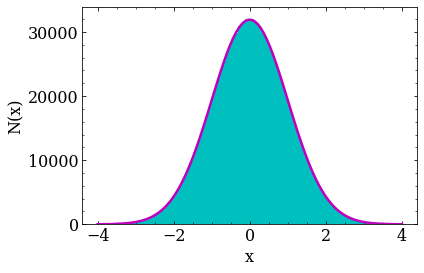

In [110]:
x = np.random.randn(int(1e7))
plt.hist(x,bins=int(1e3),range=(-4,4), color='c')
xx = np.linspace(-4,4,100)
yy = np.exp(-0.5*xx**2)/np.sqrt(2*np.pi)*1.e7/1.e3*(4-(-4))
plt.plot(xx,yy,color='m')
plt.xlabel('x')
plt.ylabel('N(x)')

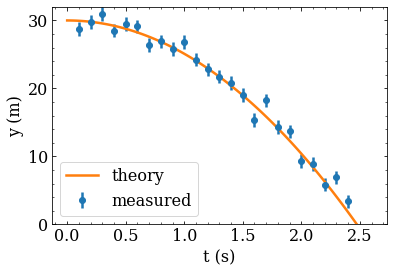

In [111]:
tmeas = np.linspace(0.1, 2.4, 24)
err = np.random.randn(24)
ymeas = 30-0.5*9.8*tmeas**2+err
plt.errorbar(tmeas,ymeas,yerr=1,linestyle=' ',marker='o',label='measured')
plt.plot(t, y,label='theory')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend(loc='lower left')

In [112]:
def gauss(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
integrate.quad(gauss,-1,1)

(0.682689492137086, 7.579375928402476e-15)

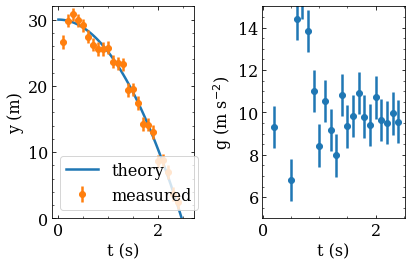

In [113]:
tmeas = np.linspace(0.1, 2.4, 24)
yerr = np.random.randn(24)
ymeas = 30-0.5*9.8*tmeas**2+yerr
gmeas = 2*(30-ymeas)/tmeas**2
gerr = 2*1/(tmeas**2)
plt.subplot(1,2,1)
plt.plot(t, y, label='theory')
plt.errorbar(tmeas,ymeas,yerr=1, linestyle=' ', marker='o', label='measured')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(0.,32.)
plt.legend(loc='lower left')
plt.subplot(1,2,2)
plt.errorbar(tmeas, gmeas, yerr=1, linestyle=' ', marker='o')
plt.xlabel('t (s)')
plt.ylabel('g (m s$^{-2}$)')
plt.ylim(5,15.)
plt.tight_layout()
plt.show()

In [114]:
gmean = np.average(gmeas, weights=1/gerr**2)
print(gmean)
gmeanerr = np.sqrt(1/np.sum(1/gerr**2))
print(gmeanerr)

9.82115216606692
0.1506264969906393
